<a href="https://colab.research.google.com/github/aryan-cs/monty-hall/blob/master/monty_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

The Monty Hall Problem, also known as the Game Show Host Problem, is a popular probability puzzle closely related to the Bertrand's Box Paradox. In the Monty Hall Problem, you, the player, are featured on the popular game show Let's Make a Deal. You are presented with three doors, behind one of which lies the grand prize (traditionally, a new car). Behind the other two are nothing (or, say, a sad goat). Your task to is to successfully pick the door which has the prize.

However, there is a twist. After you pick your choice, your host, Monty Hall, will reveal one of the remaining doors that contain a goat. Monty will never pick your door, nor will he pick the door with the prize (whether these two be the same door or not). Afterwards, he will give you the opportunity to change your initial selection.

Should you do it? Does it matter?

Let's find out!

# Setup

To generate truly random numbers, we'll use Python's `secrets` module rather than the `random` module, which gives us pseudorandom numbers.

In [2]:
import secrets

# Simulating the first choice

If our guesses are truly random, as well as the correct door choice, we should be correct ~33.33% of the time.

In [17]:
player_guess = secrets.randbelow(3)
correct_door = secrets.randbelow(3)

if player_guess == correct_door:
  print("Winner winner chicken dinner!")
else:
  print("Wrong door!")

Wrong door!


One test isn't enough to tell, so lets run a bunch of trials and see if the results match up to our expectations. Here, we'll run 100 sets of 100 games each, or 10,000 games total.

In [72]:
trial_average = 0
running_average = 0

for trial_set in range(100):
  correct_guesses = 0
  for trial in range(100):
    player_guess = secrets.randbelow(3)
    correct_door = secrets.randbelow(3)

    if player_guess == correct_door:
      correct_guesses += 1

  trial_average = correct_guesses / 100
  running_average = (running_average * trial_set + trial_average) / (trial_set + 1)

print(f"Win rate: {(running_average * 100):.2f}%")


Win rate: 33.30%


This means roughly, we'll pick the winning door 1 in 3 tries. That's kinda low!

# Monty's Hint

Now, we'll use Monty's hint and see if we do any better in finding the grand prize.

In [46]:
doors = [0, 0, 0]
doors[secrets.randbelow(3)] = 1

first_guess = secrets.randbelow(3)

montys_possible_hints = []
for door in range(3):
  if door != first_guess and doors[door] == 0:
    montys_possible_hints.append(door)

montys_hint = secrets.choice(montys_possible_hints)

# Some quick math to help us get the alternative door choice quickly
second_guess = 3 - (first_guess + montys_hint)

if doors[second_guess] == 1:
  print("Winner winner chicken dinner!")
else:
  print("Wrong door!")

Winner winner chicken dinner!


We won! But we can't be sure it wasn't just luck. Once again, let's run a bunch of trials.

In [89]:
trial_average = 0
running_average = 0

for trial_set in range(100):

  correct_guesses = 0

  for trial in range(100):
    doors = [0, 0, 0]
    doors[secrets.randbelow(3)] = 1

    first_guess = secrets.randbelow(3)

    montys_possible_hints = []
    for door in range(3):
      if door != first_guess and doors[door] == 0:
        montys_possible_hints.append(door)

    montys_hint = secrets.choice(montys_possible_hints)
    second_guess = 3 - (first_guess + montys_hint)

    if doors[second_guess] == 1:
      correct_guesses += 1

  trial_average = correct_guesses / 100
  running_average = (running_average * trial_set + trial_average) / (trial_set + 1)

print(f"Win rate: {(running_average * 100):.2f}%")

Win rate: 66.79%


Wow! It looks like switching really is the right choice! Using Monty's hint, we were able to approximately double our winning percentage.

# Let's take it one step further...

What if we have more than 3 doors? Here's what it looks like with 5 doors. Try playing around with the number of doors and see what happens to the win rate.

In [136]:
def variable_door_sim(number_of_doors, quiet):
  trial_average = 0
  running_average = 0

  for trial_set in range(100):

    correct_guesses = 0

    for trial in range(100):

      doors = [0 for i in range(number_of_doors)]
      doors[secrets.randbelow(number_of_doors)] = 1

      first_guess = secrets.randbelow(number_of_doors)

      montys_possible_hints = []
      for door in range(number_of_doors):
        if door != first_guess and doors[door] == 0:
          montys_possible_hints.append(door)

      montys_hint = secrets.choice(montys_possible_hints)

      possible_second_guesses = []
      for door in range(number_of_doors):
        if door != first_guess and door != montys_hint:
          possible_second_guesses.append(door)

      second_guess = secrets.choice(possible_second_guesses)

      if doors[second_guess] == 1:
        correct_guesses += 1

    trial_average = correct_guesses / 100
    running_average = (running_average * trial_set + trial_average) / (trial_set + 1)

  if not quiet: print(f"Win rate with {number_of_doors} doors: {(running_average * 100):.2f}% (compared to the normal {(100 / number_of_doors):.2f}%)")
  return running_average

win_rate = variable_door_sim(5, False)

Win rate with 5 doors: 26.11% (compared to the normal 20.00%)


Notice anything?

# Findings

To get a better idea of what's going on, let's look at the win rate of the switching strategy to that of the non-switching strategy with respect to presented possibilities.

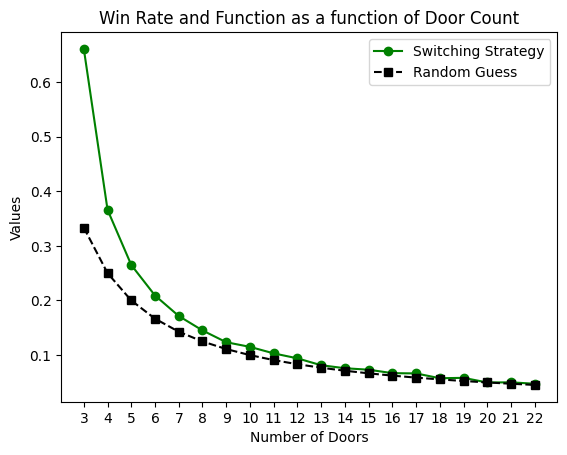

In [169]:
import matplotlib.pyplot as plt

# Create some data points
x = [i + 3 for i in range(20)]
y1 = []
y2 = [1 / (i + 3) for i in range(20)]

# Assuming variable_door_sim is defined elsewhere
for number_of_doors in x:
    y1.append(variable_door_sim(number_of_doors, True))

# Create a line plot for y1 (green line)
plt.plot(x, y1, label='Switching Strategy', color='green', linestyle='-', marker='o')

# Create a line plot for y2 (black line)
plt.plot(x, y2, label='Random Guess', color='black', linestyle='--', marker='s')

# Set the x-axis to display only whole numbers
plt.xticks(ticks=range(min(x), max(x)+1, 1))

# Add labels, title, and legend
plt.xlabel('Number of Doors')
plt.ylabel('Values')
plt.title('Win Rate and Function as a function of Door Count')
plt.legend()

# Show the plot
plt.show()

It's a little unclear what's going on after n = 14 doors, but we can clearly see that the switching strategy beats out the random guess method in all the trials with fewer than 14 doors. Overall, the two win rates decay at an exponential rate, so let's adjust our graph to account for this.

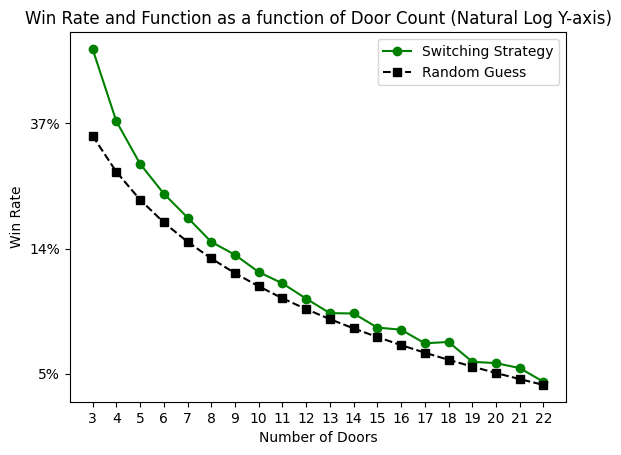

In [168]:
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter

# Create some data points
x = [i + 3 for i in range(20)]
y1 = []
y2 = [1 / (i + 3) for i in range(20)]

# Assuming variable_door_sim is defined elsewhere
for number_of_doors in x:
    y1.append(variable_door_sim(number_of_doors, True))

# Create a line plot for y1 (green line)
plt.plot(x, y1, label='Switching Strategy', color='green', linestyle='-', marker='o')

# Create a line plot for y2 (black line)
plt.plot(x, y2, label='Random Guess', color='black', linestyle='--', marker='s')

# Set the y-axis to a logarithmic scale with base e (natural log)
plt.yscale('log', base=math.e)

# Define a percentage formatter for y-axis
def percentage_formatter(x, pos):
    return f'{x * 100:.0f}%'

# Apply the percentage formatter to the y-axis
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Set the x-axis to display only whole numbers
plt.xticks(ticks=range(min(x), max(x)+1, 1))

# Add labels, title, and legend
plt.xlabel('Number of Doors')
plt.ylabel('Win Rate')
plt.title('Win Rate and Function as a function of Door Count (Natural Log Y-axis)')
plt.legend()

# Show the plot
plt.show()

Although the logarithmic scale warps the graph, we can see the win rate for the switching strategy is greater than that of the random guess method.

Moral of the story? **ALWAYS SWITCH!**